In [5]:
from LightningModules import AutoEncoder, FUCCIDataModule, ReconstructionVisualization
from kornia import tensor_to_image
from microfilm.colorify import multichannel_to_rgb
import numpy as np
from PIL import Image
from pathlib import Path
import torch
from torchmetrics import MultiScaleStructuralSimilarityIndexMeasure

In [13]:
FUCCI_PATH = '/home/ishang/cross-modal-autoencoders/FUCCI-dev-data'
res = 64

dm = FUCCIDataModule(
    data_dir=FUCCI_PATH,
    dataset="reference",
    imsize=res,
    split=(0.8, 0.1, 0.1),
    batch_size=32,
    num_workers=8
)

In [7]:
LOGS = '/data/ishang/fucci_vae'
!ls {LOGS}

FUCCI_reference_VAE_2023_16_05_06_31  FUCCI_reference_VAE_2023_16_05_22_53
FUCCI_reference_VAE_2023_16_05_06_32  FUCCI_reference_VAE_2023_16_05_23_52
FUCCI_reference_VAE_2023_16_05_06_38  FUCCI_reference_VAE_2023_16_05_23_53
FUCCI_reference_VAE_2023_16_05_06_39  FUCCI_reference_VAE_2023_16_05_23_54
FUCCI_reference_VAE_2023_16_05_06_41  FUCCI_reference_VAE_2023_16_05_23_59
FUCCI_reference_VAE_2023_16_05_06_42  FUCCI_reference_VAE_2023_17_05_00_16
FUCCI_reference_VAE_2023_16_05_07_19  FUCCI_reference_VAE_2023_17_05_00_17
FUCCI_reference_VAE_2023_16_05_07_22  FUCCI_reference_VAE_2023_17_05_02_00
FUCCI_reference_VAE_2023_16_05_08_39  FUCCI_reference_VAE_2023_17_05_02_01
FUCCI_reference_VAE_2023_16_05_08_54  FUCCI_reference_VAE_2023_17_05_02_16
FUCCI_reference_VAE_2023_16_05_08_55  FUCCI_reference_VAE_2023_17_05_02_17
FUCCI_reference_VAE_2023_16_05_09_01  FUCCI_reference_VAE_2023_17_05_02_41
FUCCI_reference_VAE_2023_16_05_09_02  FUCCI_reference_VAE_2023_17_05_02_42
FUCCI_reference_VAE_2023_

In [8]:
model_folder = 'FUCCI_reference_VAE_2023_16_05_10_26'
!ls {LOGS}/{model_folder}/lightning_logs/

'epoch=99-Val_loss=0.00.ckpt'


In [9]:
checkpoint = 'epoch=99-Val_loss=0.00.ckpt'
model_path = Path(LOGS) / model_folder / "lightning_logs" / checkpoint
model = AutoEncoder.load_from_checkpoint(model_path)


In [14]:
x = dm.dataset[:3]
x_hat = model(x)

In [18]:
def visualize_prediction(x, x_hat):
    grid = ReconstructionVisualization.make_reconstruction_grid(x, x_hat)
    img = grid.cpu().detach().numpy()
    image_composite, _, _, _= multichannel_to_rgb(img, cmaps=dm.dataset.channel_colors())
    image_composite = (255 * image_composite).astype(np.uint8)
    image_composite = Image.fromarray(image_composite)
    display(image_composite)

0.6461209654808044


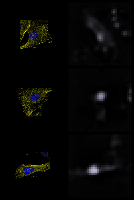

In [19]:
ms_ssim = MultiScaleStructuralSimilarityIndexMeasure(betas=(0.0448, 0.2856, 0.3001))
print(ms_ssim(x_hat, x).item())
visualize_prediction(x, x_hat)


0.5387551188468933


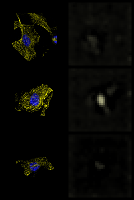

In [21]:
x = dm.dataset[3:6]
x_hat = model(x)
ms_ssim = MultiScaleStructuralSimilarityIndexMeasure(betas=(0.0448, 0.2856, 0.3001))
print(ms_ssim(x_hat, x).item())
visualize_prediction(x, x_hat)

0.5850902795791626


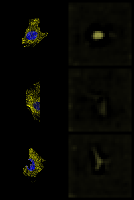

In [22]:
x = dm.dataset[6:9]
x_hat = model(x)
ms_ssim = MultiScaleStructuralSimilarityIndexMeasure(betas=(0.0448, 0.2856, 0.3001))
print(ms_ssim(x_hat, x).item())
visualize_prediction(x, x_hat)

0.5621430277824402


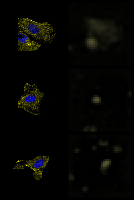

In [24]:
x = dm.dataset[15:18]
x_hat = model(x)
ms_ssim = MultiScaleStructuralSimilarityIndexMeasure(betas=(0.0448, 0.2856, 0.3001))
print(ms_ssim(x_hat, x).item())
visualize_prediction(x, x_hat)